# Enhancing Customer Loyalty at Syriatel: Predictive Modeling for Churn Prevention

## Business Understanding

The Main objective for this notebook is to develop an accurate predictive classifier to identify customer churn for Syriatel, a telecommunications company. The key focus is to assist SyriaTel in mitigating revenues losses by gaining insights into the factors driving customer churn.

Data processing was conducted to rectify missing values, encode categorical variables, and standardize numerical attributes, ensuring the dataset was prepared for modeling.
I conducted an evaluation of four different classification models to assess their performance. After this evaluation, I selected the best-performing model among them. Following this, I examined the most important features in the chosen model.

SyriaTel faces a pressing challenge in customer churn, which can lead to substantial financial losses. Customer retention is a top priority, and this project's outcome will empower SyriaTel to proactively address churn, boost customer satisfaction, and maintain its competitive edge in the telecommunications industry.

## Data Understanding

The following cell imports essential Python packages for coding.

In [2]:
# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train sets
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset into a dataframe
df = pd.read_csv('Syntel customer churn/bigml_59c28831336c6604c800002a.csv')
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [4]:
#Checking how many rows and columns are in the dataframe
df.shape

(3333, 21)

In [5]:
#viewing data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As seen above the dataset does not contain any missing values.


In [6]:
#checking for duplicates
df[df.duplicated(subset=['phone number'])].sort_values(['phone number'])

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


The dataset seems to not contain duplicate values.

In [7]:
#Summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
#Checking for the unique variables in the respective columns
for col in df.columns:
    print(df[col].value_counts())

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
WA     66
CO     66
NV     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
415    1655
510     840
408     838
Name: area code, dtype: int64
348-7556    1
361-1900    1
412-8811    1
328-6011    1
388-8583    1
           ..
340-9803    1
368-3117    1
336-4656    1
404-3106    1
389-3206    1
Name: phone number, Length: 3333, dtype: int64
no     3010
yes     323
Name: internati

In [9]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

#### Below is a summary of features found in the data set

state: the state the customer lives in

account length: the number of days the customer has had an account

area code: the area code of the customer

phone number: the phone number of the customer

international plan: true if the customer has the international plan, otherwise false

voice mail plan: true if the customer has the voice mail plan, otherwise false

number vmail messages: the number of voicemails the customer has sent

total day minutes: total number of minutes the customer has been in calls during the day

total day calls: total number of calls the user has done during the day

total day charge: total amount of money the customer was charged by the Telecom company for calls during the day

total eve minutes: total number of minutes the customer has been in calls during the evening

total eve calls: total number of calls the customer has done during the evening

total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening

total night minutes: total number of minutes the customer has been in calls during the night

total night calls: total number of calls the customer has done during the night

total night charge: total amount of money the customer was charged by the Telecom company for calls during the night

total intl minutes: total number of minutes the user has been in international calls

total intl calls: total number of international calls the customer has done

total intl charge: total amount of money the customer was charged by the Telecom company for international calls

customer service calls: number of calls the customer has made to customer service

churn: true if the customer terminated their contract, otherwise false

## Data Exploration and Preparation

In [10]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [11]:
#cleaning the columns in the data set
df.columns = [col.strip().replace(' ', '_')for col in df.columns]
df.head(2)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [12]:
#the phone_number and account_length feature will be dropped since it has no value in the analysis
df = df.drop(columns=['phone_number', 'account_length'] )
#checking if the code worked
df.head(2)

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [13]:
#checking unique values in the churn column which is our target variable
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [14]:
#converting the churn column to binary(0s and 1s)
df['churn'] = [1 if x==True else 0 for x in df['churn']]
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [15]:
#checking if the data type changed to int
df['churn'].dtype

dtype('int64')

In the above code, we have transformed the values within the 'churn' column of the dataset. Specifically, we converted 'False' values to '0' and 'True' values to '1'. This transformation represents the churn status of customers at Syriatel, where '1' indicates customers who churned, and '0' represents those who did not. Out of the total 3,333 customers, 483 chose to discontinue their contract with Syriatel.
This binary format in the 'churn' column is essential because it will serve as the target variable in our future predictive models. This transformation simplifies the task of classification, where our goal is to predict whether a customer will churn or not. With the 'churn' column now containing binary values, our models can efficiently learn and make predictions based on this categorical outcome, enabling us to anticipate customer churn more effectively.

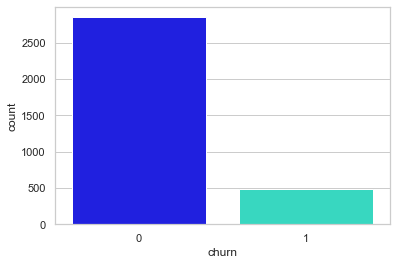

In [16]:
#visually representing the distribution
custom_palette = ["#0000ff", "#1df1d3"] 
sns.set(style='whitegrid')
sns.countplot(data=df, x='churn', palette=custom_palette);

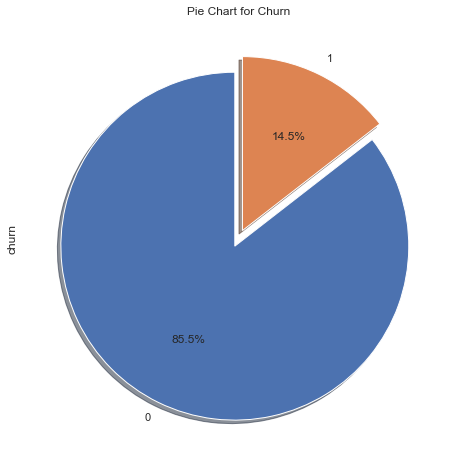

In [17]:
#Using a pie-chart to represent churn in percentage
df['churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

Based on the pie chart above, it's evident that 14.5% of the customers chose to terminate their contracts with SyriaTel.

In [18]:
#splitting the features to numerical and categorical features
cat_features = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
num_features = [x for x in df.columns if x not in  cat_features and x != 'churn']
print('Numerical features:', num_features)
print('Categorical features:', cat_features)


Numerical features: ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']
Categorical features: ['state', 'area_code', 'international_plan', 'voice_mail_plan']


Next i will make distribution plots for some of the numerical features.

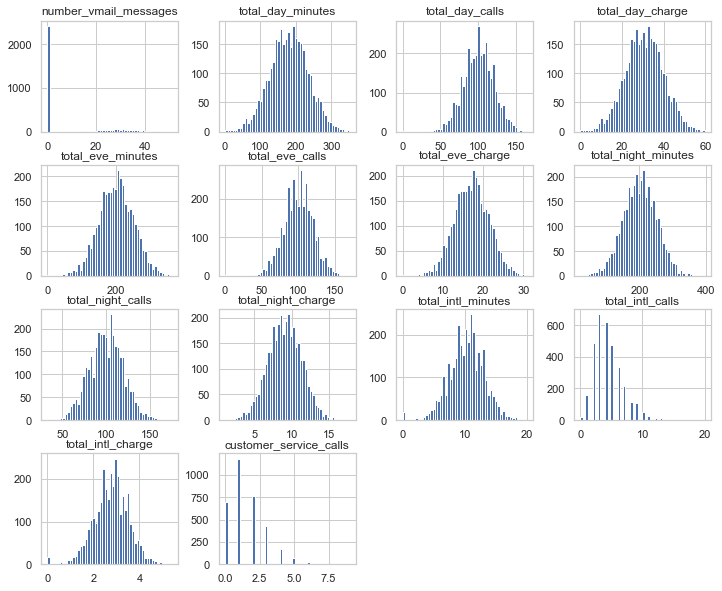

In [19]:
num = df[num_features]
num.head()
hist = num.hist(bins=50,figsize  = [12, 10])
# Create a Matplotlib figure object
fig = plt.gcf()

# Save the figure to a file (e.g., in PNG format)
fig.savefig("./images/distribution.png")

# Optionally, display the figure
plt.show()

The distribution plots reveal that the majority of numerical features follow a normal distribution, except for 'customer_service_calls' and 'number_vmail_messages.' However, it's important to note that the distribution of 'total_int_calls' is also somewhat normal, albeit slightly skewed to the right side.

Next i will check for the churn distribution in the categorical features.


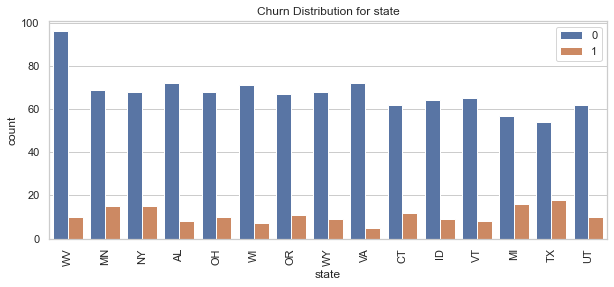

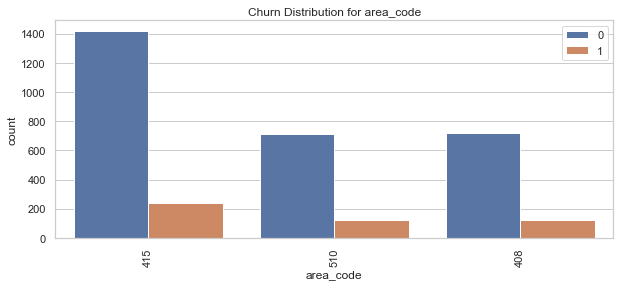

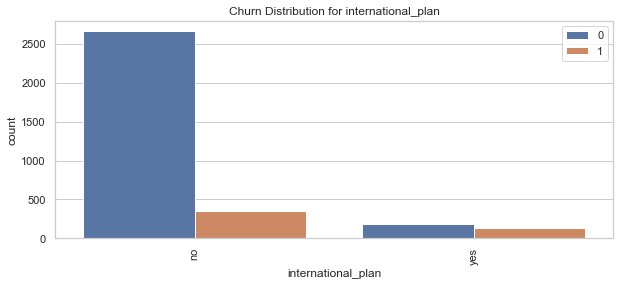

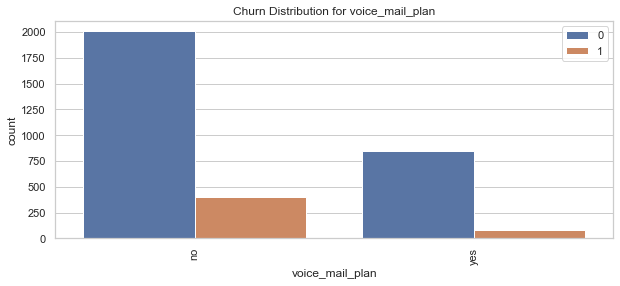

In [20]:
cat =df[cat_features]
for column in cat.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, hue="churn", data=df, order=df[column].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Churn Distribution for {column}')
    plt.savefig(f'churn_distribution_{column}.png')
    plt.show()

### Correlation Heatmap for the features

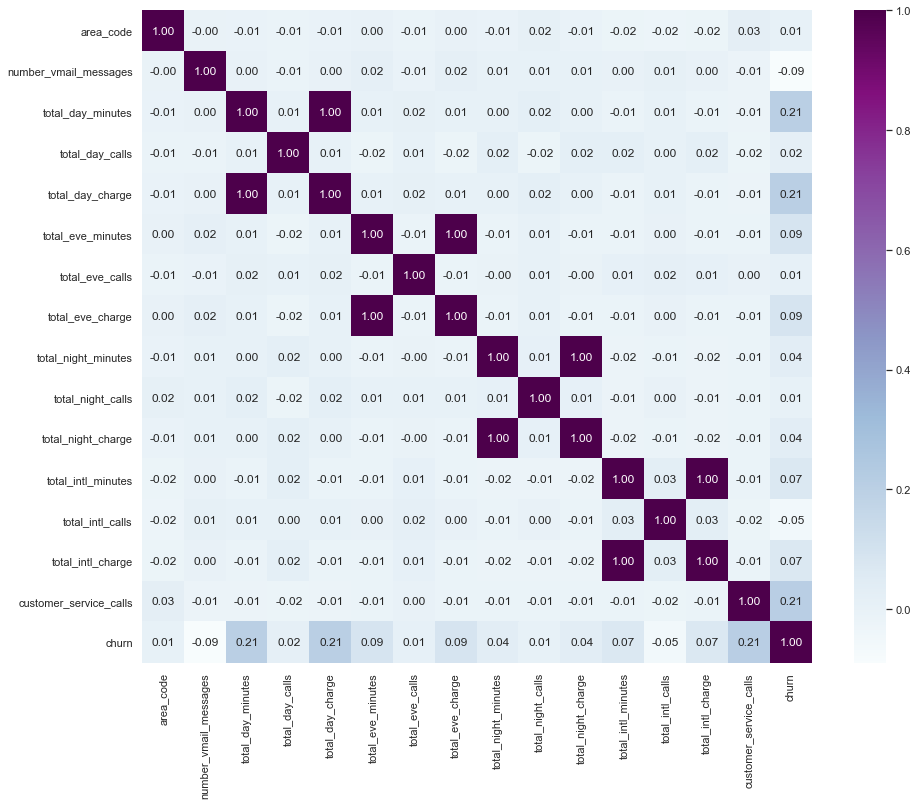

In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the figure size to accommodate all features
plt.figure(figsize=(15, 12))

# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BuPu')

plt.savefig(fname='./images/correlation.png', facecolor='white')
# Show the plot
plt.show()

Many of the features in the dataset exhibit little to no correlation with each other, except for some pairs that show a perfect correlation of 1. These pairs with perfect correlation include:

* Total day charge and total day minutes
* Total evening charge and total evening minutes
* Total night charge and total night minutes
* Total international charge and total international minutes

This high correlation between charge and minutes is expected, as the charge for each category is directly dependent on the number of minutes used. The perfect correlation, indicated by a correlation coefficient of 1, is a sign of perfect multicollinearity. In the context of linear models, perfect multicollinearity can cause issues, but its impact on nonlinear models may vary. While some nonlinear models are affected by perfect multicollinearity, others may not be as sensitive to it.







### One hot encoding the categorical variables

Before applying one-hot encoding to the categorical features, I considered using label encoding for the 'state' column. One-hot encoding, in this case, would create numerous dummy variables, potentially leading to issues with high dimensionality. Additionally, it could pose challenges for some nonlinear models that might not perform well.

The LabelEncoder is a data preprocessing technique that will be used to convert the 'state' categorical feature into numerical values. It assigns a unique integer to each category within the 'state' feature, enabling machine learning algorithms to work with the data more effectively.

In contrast, One-Hot encoding transforms the remaining categorical features into binary dummy variables, represented by 0s and 1s. This technique creates a separate binary column for each category within a feature, indicating the presence or absence of that category for each data point.


In [22]:
le = LabelEncoder()
le.fit(df['state'])
df['state'] = le.transform(df['state'])
df.head(2)

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,35,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [23]:
#One hot encoding the rest of the categorical features
categorical_cols = ['area_code', 'international_plan', "voice_mail_plan"]

# Applying one-hot encoding and concatenating the dummy variables
for col in categorical_cols:
    df = pd.concat([df, pd.get_dummies(df[col], dtype=np.int64, prefix=col + "_is", drop_first=True)], axis=1)

# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Drop the original categorical columns
df = df.drop(categorical_cols, axis=1)

# Display the updated dataframe
df.head()


,state,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,16,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,35,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
2,31,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,0,0
3,35,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
4,36,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0,1,0


### Dealing with Outliers

In [24]:
#Predictors
X = df.drop(columns = ['churn'])
#Target
y = df['churn']

print('Predictors:', X.columns)
print('Target:', 'churn')

Predictors: Index(['state', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'area_code_is_415', 'area_code_is_510', 'international_plan_is_yes',
       'voice_mail_plan_is_yes'],
      dtype='object')
Target: churn


The code below removes numerical outliers using a threshold of 3 standard deviations (z-scores) to identify extreme values. This threshold helps maintain data integrity by excluding extreme observations that could disproportionately influence the analysis or modeling results.

In [25]:
def drop_numerical_outliers(X, y, z_thresh=3):
    # Creates a DataFrame combining both X and y
    combined_df = pd.concat([X, y], axis=1)
    
    # Calculates z-scores for numerical columns
    z_scores = np.abs(stats.zscore(combined_df.select_dtypes(include=[np.number])))
    
    # Defines a condition for rows where all z-scores are within the threshold
    constrains = (z_scores < z_thresh).all(axis=1)
    
    # Drops rows that contain outliers
    combined_df_clean = combined_df[constrains]
    
    # Separates X and y from the cleaned DataFrame
    X_clean = combined_df_clean.drop(columns=[y.name])
    y_clean = combined_df_clean[y.name]
    
    return X_clean, y_clean

In [26]:
#Applying the function
X, y = drop_numerical_outliers(X, y)
print(len(X))

2866


## Modelling

In [27]:
#Scaling the continuous features
cont = num_features
X_cont = X[cont]
scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X_cont)
X[cont] = X_cont_scaled
X.head(2)

,state,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,16,1.259626,1.598456,0.480833,1.598735,-0.071458,-0.057886,-0.071270,0.871922,-0.461453,0.871199,-0.101921,-0.634614,-0.10266,-0.427956,1,0,0,1
1,35,1.333449,-0.332745,1.144444,-0.333025,-0.109616,0.144433,-0.109075,1.067069,0.157513,1.067908,1.279107,-0.634614,1.27978,-0.427956,1,0,0,1


In [28]:
#splitting the data to training and testing sets for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set shape:', 'X,', X_train.shape, 'y,', y_train.shape)
print('Test set shape:', 'X,' , X_test.shape, 'y:', y_test.shape)


Train set shape: X, (2292, 19) y, (2292,)
Test set shape: X, (574, 19) y: (574,)


Before diving into model training, we'll address the class imbalance issue in the training set by applying SMOTE (Synthetic Minority Oversampling Technique). Class imbalance occurs when one class (in this case, 'Churn') is significantly underrepresented compared to another class. SMOTE combats this by generating synthetic samples for the minority class, effectively balancing the class distribution and mitigating potential overfitting problems that can arise with random oversampling ensuring a more robust and accurate model.

In [29]:
y_train.value_counts()
#the minority class is the group of customers who have churned(positive class)

0    2043
1     249
Name: churn, dtype: int64

In [30]:
# The SMOTE will be applied to the positive class
 #k_neighbors=3 mean that SMOTE will identify the three closest samples to each minority class instance and generate synthetic samples by interpolating between them. 
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
print('Before SMOTE, X_train:', X_train.shape)
print('After SMOTE, X_train_resampled:', X_train_resampled.shape)
print('Before SMOTE, y_train:', y_train.shape)
print('After SMOTE, y_train_resampled:', y_train_resampled.shape )

Before SMOTE, X_train: (2292, 19)
After SMOTE, X_train_resampled: (4086, 19)
Before SMOTE, y_train: (2292,)
After SMOTE, y_train_resampled: (4086,)


In [31]:
y_train_resampled.value_counts()
#The class imbalance issues has been dealt with.c9

1    2043
0    2043
Name: churn, dtype: int64

## Baseline Models

### Model 1 : Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)
y_test_pred = logreg.predict(X_test)

In [33]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       508
           1       0.30      0.61      0.40        66

    accuracy                           0.79       574
   macro avg       0.62      0.71      0.64       574
weighted avg       0.87      0.79      0.82       574



In [34]:
print('Testing Precision: ', precision_score(y_test, y_test_pred))
print('Testing Recall: ', recall_score(y_test, y_test_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred))

Testing Precision:  0.2962962962962963
Testing Recall:  0.6060606060606061
Testing Accuracy:  0.789198606271777
Testing F1-Score:  0.3980099502487562


Testing Precision (0.30) indicates that the model correctly predicted approximately 30% of the positive cases. Testing Recall (0.61) reveals that the model captured around 61% of the actual positive cases. Testing Accuracy (0.79) shows that the model's overall correct prediction rate stands at approximately 79%. Testing F1-Score (0.40) suggests that the model strikes a balance between precision and recall, with a score of around 40%, indicating its potential to effectively classify instances while considering both false positives and false negatives.

In [35]:
#Below is  a function that plots a confusion matrix
import itertools
def plot_confusion_matrix(model, X, y, labels):
    cfm = confusion_matrix(y, model.predict(X))
    plt.figure(figsize=(8, 6))
    plt.imshow(cfm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    thresh = cfm.max() / 2.0
    for i, j in itertools.product(range(cfm.shape[0]), range(cfm.shape[1])):
        plt.text(j, i, format(cfm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cfm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


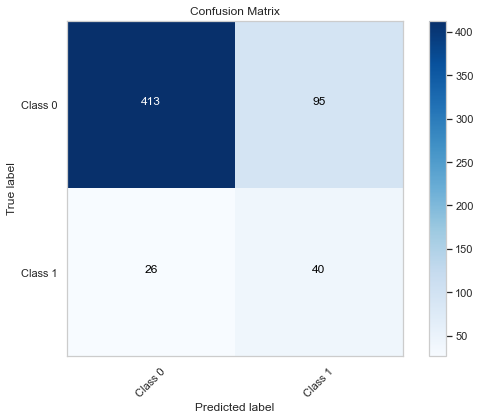

In [36]:
class_labels = ['Class 0', 'Class 1']

plot_confusion_matrix(logreg, X_test, y_test, class_labels)
plt.grid(visible=False)
plt.savefig(fname='./images/cm1.png', facecolor='white')

plt.show()


### Model 2: Decision Tree

In [37]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled,y_train_resampled)
y_te_pred_dt = dt.predict(X_test)

In [38]:
report = classification_report(y_test, y_te_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       508
           1       0.51      0.68      0.58        66

    accuracy                           0.89       574
   macro avg       0.73      0.80      0.76       574
weighted avg       0.91      0.89      0.90       574



In [39]:
print('Testing Precision: ', precision_score(y_test, y_te_pred_dt))
print('Testing Recall: ', recall_score(y_test, y_te_pred_dt))
print('Testing Accuracy: ', accuracy_score(y_test, y_te_pred_dt))
print('Testing F1-Score: ', f1_score(y_test, y_te_pred_dt))

Testing Precision:  0.5113636363636364
Testing Recall:  0.6818181818181818
Testing Accuracy:  0.8885017421602788
Testing F1-Score:  0.5844155844155844


In this evaluation, the model exhibits improved performance compared to the previous results. Testing Precision (0.51) is higher, signifying that approximately 51% of the positive cases were correctly predicted. Testing Recall (0.68) has also increased, indicating that approximately 68% of actual positive cases were captured. The Testing Accuracy (0.89) has improved, demonstrating an overall correct prediction rate of about 89%. Testing F1-Score (0.58) reveals a balance between precision and recall, suggesting that the model can effectively classify instances while considering false positives and false negatives, with a score of around 58%. This evaluation demonstrates that the model's predictive capabilities have been enhanced in comparison to the initial results, with increased precision, recall, accuracy, and F1-Score.

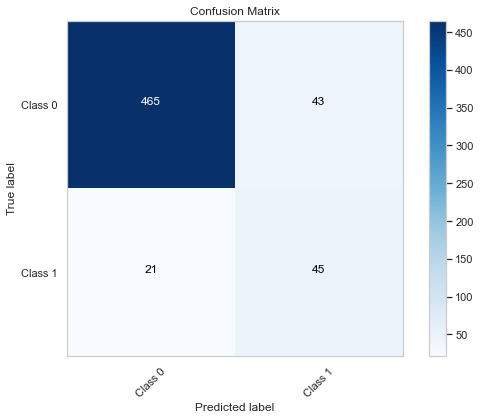

In [40]:
plot_confusion_matrix(dt, X_test, y_test, class_labels)
plt.grid(visible=False)
plt.savefig(fname='./images/cm2.png', facecolor='white')

plt.show()


### Model 3: Random Forest

In [42]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
y_te_pred_rf = rf_model.predict(X_test)

In [43]:
report = classification_report(y_test, y_te_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       508
           1       0.70      0.71      0.71        66

    accuracy                           0.93       574
   macro avg       0.83      0.84      0.83       574
weighted avg       0.93      0.93      0.93       574



In [44]:
print('Testing Precision: ', precision_score(y_test, y_te_pred_rf))
print('Testing Recall: ', recall_score(y_test, y_te_pred_rf))
print('Testing Accuracy: ', accuracy_score(y_test, y_te_pred_rf))
print('Testing F1-Score: ', f1_score(y_test, y_te_pred_rf))

Testing Precision:  0.7014925373134329
Testing Recall:  0.7121212121212122
Testing Accuracy:  0.9320557491289199
Testing F1-Score:  0.7067669172932332


In this evaluation, the model demonstrates even more remarkable performance. The Testing Precision (0.70) indicates that approximately 70% of positive predictions are correct. Testing Recall (0.71) signifies that approximately 71% of actual positive cases are correctly identified. The Testing Accuracy (0.93) reflects an overall accuracy rate of about 93%, showcasing the model's ability to make correct predictions. The Testing F1-Score (0.7068) showcases a harmonious balance between precision and recall, highlighting the model's effectiveness in correctly classifying instances while considering both false positives and false negatives, with a score of approximately 71%. These results indicate a significant improvement in the model's predictive capabilities, with higher precision, recall, accuracy, and F1-Score compared to previous evaluations.

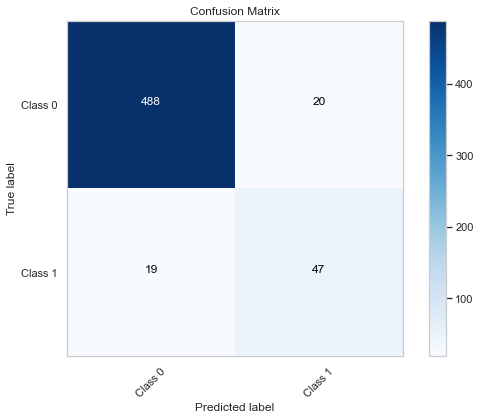

In [45]:
plot_confusion_matrix(rf_model, X_test, y_test, class_labels)
plt.grid(visible=False)
plt.savefig(fname='./images/cm3.png', facecolor='white')

plt.show()


### Model 4: K-Nearest Neighbors(KNN)

In [46]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
y_te_pred_knn = knn_model.predict(X_test)

In [47]:
report = classification_report(y_test, y_te_pred_knn)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       508
           1       0.26      0.64      0.37        66

    accuracy                           0.75       574
   macro avg       0.60      0.70      0.61       574
weighted avg       0.86      0.75      0.79       574



In [48]:
print('Testing Precision: ', precision_score(y_test, y_te_pred_knn))
print('Testing Recall: ', recall_score(y_test, y_te_pred_knn))
print('Testing Accuracy: ', accuracy_score(y_test, y_te_pred_knn))
print('Testing F1-Score: ', f1_score(y_test, y_te_pred_knn))

Testing Precision:  0.2625
Testing Recall:  0.6363636363636364
Testing Accuracy:  0.7526132404181185
Testing F1-Score:  0.3716814159292035


In this evaluation, the model's Testing Precision (0.2625) signifies that approximately 26% of positive predictions are correct, while the Testing Recall (0.6364) indicates that around 64% of actual positive cases are correctly identified. The Testing Accuracy (0.7526) reflects an overall accuracy rate of about 75%, showcasing the model's ability to make correct predictions. The Testing F1-Score (0.3717) illustrates the balance between precision and recall, emphasizing the model's effectiveness in classifying instances while considering both false positives and false negatives. These results suggest that the model has room for improvement in its predictive capabilities, with potential enhancements in precision, recall, and the F1-Score to achieve better overall performance.

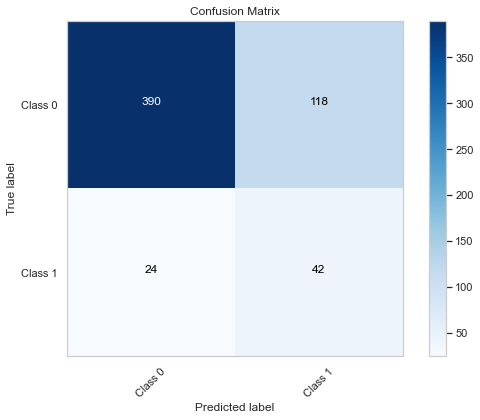

In [49]:
plot_confusion_matrix(knn_model, X_test, y_test, class_labels)
plt.grid(visible=False)
plt.savefig(fname='./images/cm4.png', facecolor='white')

plt.show()


## Hyperparameter Tuning

For all the above baseline models, hyperparameter tuning will be used using cross-validated GridSearchCV. GridSearchCV exhaustively searches through a predefined hyperparameter grid to find the optimal combination for a machine learning model, enhancing its performance.

### 1. Logistic Regression

In [50]:
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)


X_train_resampled shape: (4086, 19)
y_train_resampled shape: (4086,)


In [51]:
#parameter grid
lr_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
             'C': np.logspace(0, 4, 5),
             'solver': ['lbfgs', 'newton-cg', 'liblinear', 'saga'],
             'max_iter' : [100, 200, 300, 500, 1000]}


In [52]:
#Grid search for the model's optimiztion
lr_model_tuned = LogisticRegression()
lr_cv_model = GridSearchCV(lr_model_tuned, lr_params, cv=3, n_jobs= -1, verbose=1)
lr_cv_model.fit(X_train_resampled, y_train_resampled)
print("Best parameters: " + str(lr_cv_model.best_params_))

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Best parameters: {'C': 1000.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [53]:
#Model with GridSearchCV 
lr_model_w_CV = LogisticRegression(C= 10000, max_iter=100, penalty='l2', solver='liblinear')
lr_model_w_CV.fit(X_train_resampled, y_train_resampled)
y_te_pred_lrcv = lr_model_w_CV.predict(X_test)

In [54]:
report = classification_report(y_test, y_te_pred_lrcv)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       508
           1       0.30      0.62      0.41        66

    accuracy                           0.79       574
   macro avg       0.62      0.72      0.64       574
weighted avg       0.87      0.79      0.82       574



In [55]:
print('Testing Precision: ', precision_score(y_test, y_te_pred_lrcv))
print('Testing Recall: ', recall_score(y_test, y_te_pred_lrcv))
print('Testing Accuracy: ', accuracy_score(y_test, y_te_pred_lrcv))
print('Testing F1-Score: ', f1_score(y_test, y_te_pred_lrcv))

Testing Precision:  0.3014705882352941
Testing Recall:  0.6212121212121212
Testing Accuracy:  0.7909407665505227
Testing F1-Score:  0.4059405940594059


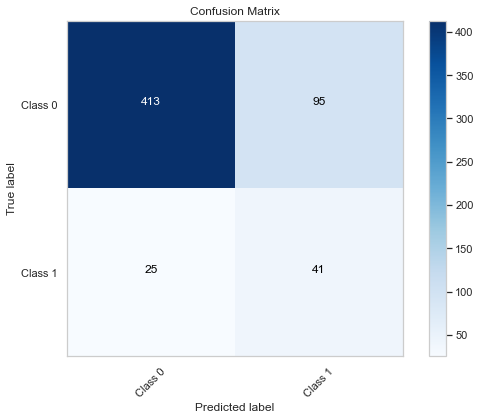

In [56]:
plot_confusion_matrix(lr_model_w_CV, X_test, y_test, class_labels)
plt.grid(visible=False)
plt.savefig(fname='./images/cm5.png', facecolor='white')

plt.show()

In [96]:
#Comparison
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Classifier (Default)',
                                          'Tuned Logistic Regression Classifier'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_test_pred), accuracy_score(y_test,y_te_pred_lrcv)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_test_pred), f1_score(y_test,y_te_pred_lrcv)],
                                 'Recall (Test Set)':[recall_score(y_test, y_test_pred), recall_score(y_test,y_te_pred_lrcv)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_test_pred), precision_score(y_test,y_te_pred_lrcv)]}) 

comparison_frame.style.highlight_max(color = 'lightblue', axis = 0)

,Model,Accuracy (Test Set),F1 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Logistic Regression Classifier (Default),0.789199,0.398010,0.606061,0.296296
1,Tuned Logistic Regression Classifier,0.790941,0.405941,0.621212,0.301471


The tuned model did better at accuracy, f1 score, recall and precision.

### 2. Decision Tree

In [58]:
dt_params = {
    'max_depth': [2, 5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 30, 40],
    'class_weight': [None, 'balanced'],
}

In [59]:
dt_model_2 = DecisionTreeClassifier()
dt_cv_model = GridSearchCV(dt_model_2, dt_params, cv=3, n_jobs=-1, verbose=False)
dt_cv_model.fit(X_train_resampled, y_train_resampled)
print("Best parameters:"+str(dt_cv_model.best_params_))

Best parameters:{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [60]:
#dt with GridSearchCV
dt_wcv_model = DecisionTreeClassifier(class_weight='balanced',
                                      criterion='entropy',
                                      max_depth=20,
                                      max_features= 'sqrt', 
                                      max_leaf_nodes= None, 
                                      min_samples_leaf = 1, 
                                      min_samples_split = 10
                                      )
dt_wcv_model.fit(X_train_resampled, y_train_resampled)
y_te_pred_dtcv = dt_wcv_model.predict(X_test)

In [61]:
report = classification_report(y_test, y_te_pred_dtcv)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       508
           1       0.40      0.53      0.46        66

    accuracy                           0.86       574
   macro avg       0.67      0.71      0.69       574
weighted avg       0.87      0.86      0.86       574



In [62]:
print('Testing Precision: ', precision_score(y_test, y_te_pred_dtcv))
print('Testing Recall: ', recall_score(y_test, y_te_pred_dtcv))
print('Testing Accuracy: ', accuracy_score(y_test, y_te_pred_dtcv))
print('Testing F1-Score: ', f1_score(y_test, y_te_pred_dtcv))

Testing Precision:  0.40229885057471265
Testing Recall:  0.5303030303030303
Testing Accuracy:  0.8554006968641115
Testing F1-Score:  0.45751633986928103


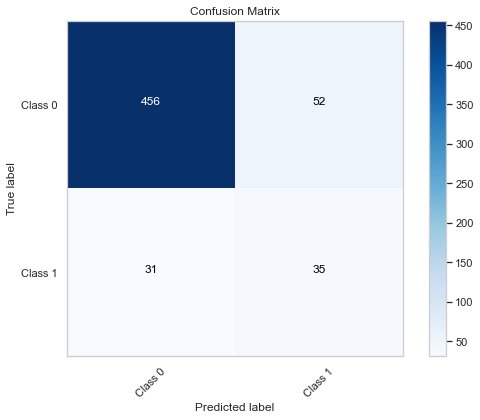

In [63]:
plot_confusion_matrix(dt_wcv_model, X_test, y_test, class_labels)
plt.grid(visible=False)
plt.savefig(fname='./images/cm6.png', facecolor='white')

plt.show()

In [95]:
#Comparison
comparison_frame = pd.DataFrame({'Model':['Decision Tree Classifier (Default)',
                                          'Tuned Decision Tree Classifier'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_te_pred_dt), accuracy_score(y_test,y_te_pred_dtcv)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_te_pred_dt), f1_score(y_test,y_te_pred_dtcv)],
                                 'Recall (Test Set)':[recall_score(y_test, y_te_pred_dt), recall_score(y_test,y_te_pred_dtcv)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_test_pred), precision_score(y_test,y_te_pred_dtcv)]}) 

comparison_frame.style.highlight_max(color = 'lightblue', axis = 0)

,Model,Accuracy (Test Set),F1 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Decision Tree Classifier (Default),0.888502,0.584416,0.681818,0.296296
1,Tuned Decision Tree Classifier,0.855401,0.457516,0.530303,0.402299


### 3. Random Forest

In [65]:
rf_params= {'n_estimators': [50, 100],
            'max_depth': [10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['auto', 'sqrt'],
            'criterion': ['gini', 'entropy'],
    }

In [66]:
rf_model_2 = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model_2, rf_params, cv=3, n_jobs= -1, verbose=False)
rf_cv_model.fit(X_train_resampled, y_train_resampled)
print("Best parameters:"+str(rf_cv_model.best_params_))

Best parameters:{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [67]:
rf_cv_model = RandomForestClassifier(criterion= 'entropy',
                                      max_depth= 20, 
                                      max_features = 'sqrt', 
                                      min_samples_leaf= 1,
                                      min_samples_split= 2, 
                                        n_estimators= 50)
rf_cv_model.fit(X_train_resampled, y_train_resampled)
y_te_pred_rfcv = rf_cv_model.predict(X_test)

In [68]:
report = classification_report(y_test, y_te_pred_rfcv)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       508
           1       0.69      0.68      0.69        66

    accuracy                           0.93       574
   macro avg       0.83      0.82      0.82       574
weighted avg       0.93      0.93      0.93       574



In [69]:
print('Testing Precision: ', precision_score(y_test, y_te_pred_rfcv))
print('Testing Recall: ', recall_score(y_test, y_te_pred_rfcv))
print('Testing Accuracy: ', accuracy_score(y_test, y_te_pred_rfcv))
print('Testing F1-Score: ', f1_score(y_test, y_te_pred_rfcv))

Testing Precision:  0.6923076923076923
Testing Recall:  0.6818181818181818
Testing Accuracy:  0.9285714285714286
Testing F1-Score:  0.6870229007633587


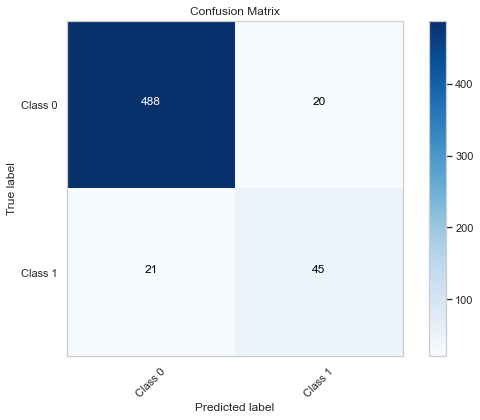

In [70]:
plot_confusion_matrix(rf_cv_model, X_test, y_test, class_labels)
plt.grid(visible=False)
plt.savefig(fname='./images/cm7.png', facecolor='white')

plt.show()

In [93]:
comparison_frame = pd.DataFrame({'Model':['Random Forest Classifier (Default)',
                                          'Tuned Random Forest Classifier'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_te_pred_rf), accuracy_score(y_test,y_te_pred_rfcv)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_te_pred_rf), f1_score(y_test,y_te_pred_rfcv)],
                                 'Recall (Test Set)':[recall_score(y_test, y_te_pred_rf), recall_score(y_test,y_te_pred_rfcv)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_te_pred_rf), precision_score(y_test,y_te_pred_rfcv)]}) 

comparison_frame.style.highlight_max(color = 'lightblue', axis = 0)

,Model,Accuracy (Test Set),F1 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Random Forest Classifier (Default),0.932056,0.706767,0.712121,0.701493
1,Tuned Random Forest Classifier,0.928571,0.687023,0.681818,0.692308


### 4. KNN

In [72]:
knn_params = {
    'n_neighbors': [3, 13, 23, 33, 43, 53, 63, 73],  
    'weights': ['uniform', 'distance'], 
     'metric' : ['manhattan', 'euclidean', 'minkowski'],
    'p': [1, 2, 10] 
     }

In [73]:
knn_model_2 = KNeighborsClassifier()
knn_cv_model = GridSearchCV(knn_model_2, knn_params, cv=3, n_jobs= -1, verbose=False)
knn_cv_model.fit(X_train_resampled, y_train_resampled)
print("Best parameters: ", knn_cv_model.best_params_)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [74]:
knn_cv_model = KNeighborsClassifier(metric= 'euclidean', 
                                    n_neighbors= 3, 
                                    p = 1, 
                                    weights= 'uniform') 
knn_cv_model.fit(X_train_resampled, y_train_resampled)
y_te_pred_knncv = knn_cv_model.predict(X_test)

In [75]:
report = classification_report(y_test, y_te_pred_knncv)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       508
           1       0.26      0.55      0.35        66

    accuracy                           0.77       574
   macro avg       0.59      0.67      0.60       574
weighted avg       0.85      0.77      0.80       574



In [76]:
print('Testing Precision: ', precision_score(y_test, y_te_pred_knncv))
print('Testing Recall: ', recall_score(y_test, y_te_pred_knncv))
print('Testing Accuracy: ', accuracy_score(y_test, y_te_pred_knncv))
print('Testing F1-Score: ', f1_score(y_test, y_te_pred_rfcv))

Testing Precision:  0.2571428571428571
Testing Recall:  0.5454545454545454
Testing Accuracy:  0.7665505226480837
Testing F1-Score:  0.6870229007633587


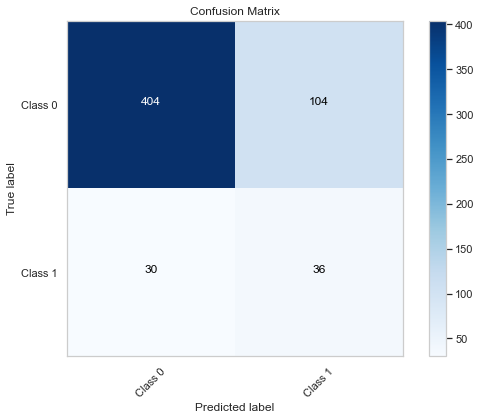

In [77]:
plot_confusion_matrix(knn_cv_model, X_test, y_test, class_labels)
plt.grid(visible=False)
plt.savefig(fname='./images/cm8.png', facecolor='white')

plt.show()

In [94]:
comparison_frame = pd.DataFrame({'Model':['Knn Classifier (Default)',
                                          'Tune Knn Classifier'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_te_pred_knn), accuracy_score(y_test,y_te_pred_knncv)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_te_pred_knn), f1_score(y_test,y_te_pred_knncv)],
                                 'Recall (Test Set)':[recall_score(y_test, y_te_pred_knn), recall_score(y_test,y_te_pred_knncv)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_te_pred_knn), precision_score(y_test,y_te_pred_knncv)]}) 

comparison_frame.style.highlight_max(color = 'lightblue', axis = 0)

,Model,Accuracy (Test Set),F1 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Knn Classifier (Default),0.752613,0.371681,0.636364,0.262500
1,Tune Knn Classifier,0.766551,0.349515,0.545455,0.257143


## Evaluation

### Model Comparison

These models have undergone hyperparameter tuning to enhance their performance. Let's proceed to evaluate and compare the results achieved by these optimized models.


### ROC Curve Analysis and Model Ranking
A model with a higher ROC curve that is closer to the top-left corner indicates better predictive accuracy.
The area under the ROC curve (AUC) is also calculated. A higher AUC indicates better discrimination power.

In [79]:
#Tuned Models
models = [('Tuned LogisticRegression', lr_model_w_CV),
          ('Tuned DecisionTree', dt_wcv_model),
          ('Tuned RandomForest', rf_cv_model),
          ('Tuned K-Nearest Neighbours', knn_cv_model)]

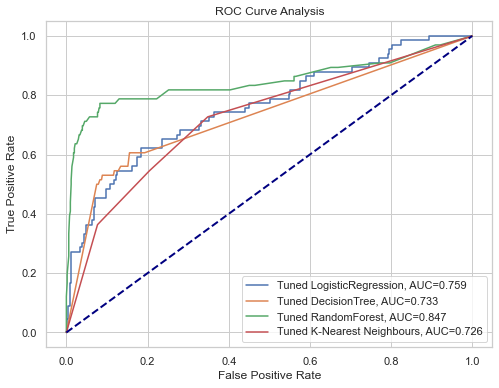

Models sorted by AUC in descending order:

Tuned RandomForest
Tuned LogisticRegression
Tuned DecisionTree
Tuned K-Nearest Neighbours


In [98]:
plt.figure(figsize=(8, 6))
roc_auc_values = []

for model_name, model in models:
    y_probas = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probas)

    roc_auc = roc_auc_score(y_test, y_probas)
    roc_auc_values.append((model_name, roc_auc))
    plt.plot(fpr, tpr, label=f'{model_name}, AUC={roc_auc:.3f}')

# Sort models by AUC in descending order
roc_auc_values.sort(key=lambda x: x[1], reverse=True)

sorted_model_names = [model[0] for model in roc_auc_values]

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend()
plt.savefig('images/roc.png')
plt.show()

print("\033[1mModels sorted by AUC in descending order:\n\033[0m")
for model_name in sorted_model_names:
    print(model_name)

### Accuracy (10-fold cross-validated)

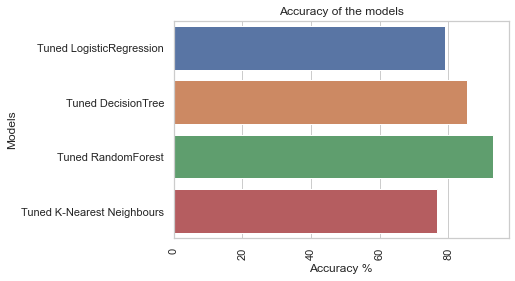

In [81]:
results_acc = pd.DataFrame(columns=["Models", "Accuracy"])

for model_name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[model_name, accuracy * 100]], columns=["Models", "Accuracy"])
    results_acc = results_acc.append(result)

sns.barplot(x='Accuracy', y='Models', data=results_acc, palette='deep')
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')
plt.xticks(rotation=90)
plt.savefig('images/accuracy.png')
plt.show()

In [82]:
results_acc.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy
0,Tuned RandomForest,92.857143
0,Tuned DecisionTree,85.540070
0,Tuned LogisticRegression,79.094077
0,Tuned K-Nearest Neighbours,76.655052


### F1 Score (10-fold cross-validated)

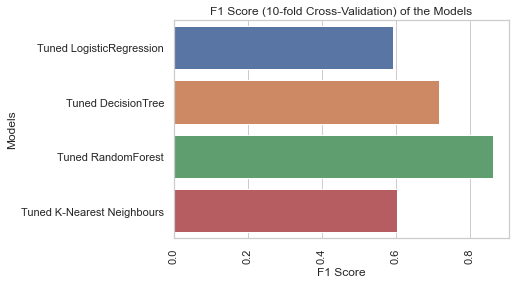

In [83]:
# Calculates F1 scores and sorts the models by F1 score in descending order
f1_scores = []
results_f1= pd.DataFrame(columns=["Models", "F1 Score"])

for model_name, model in models:
    f1_scores = cross_val_score(model, X, y, cv=10, scoring='f1_macro')
    result = pd.DataFrame([[model_name, f1_scores.mean()]], columns=["Models", "F1 Score"])
    results_f1 = results_f1.append(result)

sns.barplot(x='F1 Score', y='Models', data=results_f1, palette='deep')
plt.xlabel('F1 Score')
plt.ylabel('Models')
plt.title('F1 Score (10-fold Cross-Validation) of the Models')
plt.xticks(rotation=90)
plt.savefig('images/f1.png')
plt.show()


In [84]:
results_f1.sort_values(by='F1 Score', ascending=False)

,Models,F1 Score
0,Tuned RandomForest,0.861548
0,Tuned DecisionTree,0.716115
0,Tuned K-Nearest Neighbours,0.604070
0,Tuned LogisticRegression,0.592031


### Model Selection

The Random Forest model stands out as the top choice, boasting exceptional accuracy of  92.857143% and an impressive F1 score of 86.1548%. This means it excels at precisely classifying instances while maintaining a balanced trade-off between precision and recall.

Random Forest's strengths extend to its capacity to handle high-dimensional data and intricate feature relationships. It leverages multiple decision trees, mitigating overfitting and enhancing generalization on unseen data. Furthermore, it gracefully manages outliers, noisy data, and missing values.

Overall, the Random Forest model's remarkable accuracy, resilience against overfitting, and ability to identify vital features make it a dependable choice for this classification task.

### Feature importance according to the Random Forest Model

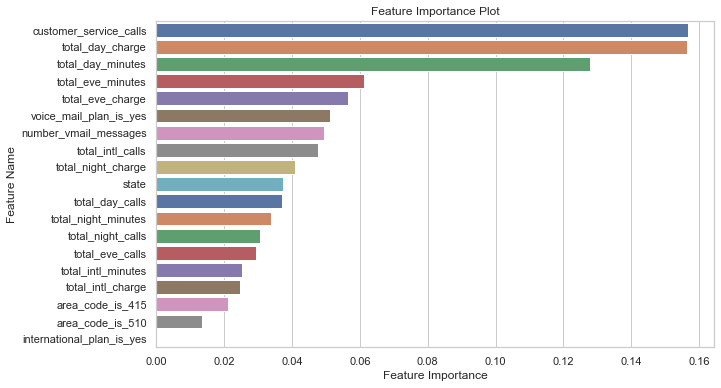

In [85]:
feature_importance = rf_cv_model.feature_importances_
sorted_feature_importance = sorted(zip(feature_importance, X_train_resampled.columns), reverse=True)

importance_df = pd.DataFrame(sorted_feature_importance, columns=['Importance', 'Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='deep')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Plot')
plt.savefig('images/featureim.png')
plt.show()



## Findings

#### Top 10 Most Important Features

In [86]:
importance_df.head(10)

,Importance,Feature
0,0.156667,customer_service_calls
1,0.156389,total_day_charge
2,0.127794,total_day_minutes
3,0.061367,total_eve_minutes
4,0.056382,total_eve_charge
5,0.051212,voice_mail_plan_is_yes
6,0.049376,number_vmail_messages
7,0.047570,total_intl_calls
8,0.040894,total_night_charge
9,0.037323,state


1. Customer Service Calls :
* This has the highest feature importance. This suggest that customers who frequently contant customer service may be more likely to churn. This could be a sign of unresolved issues or dissatisfaction.

2. Total Day Charge and Total Day Minutes:
* This implies that the amount a customer is charged during the day and the total minutes spent on day calls plays a crucial role in predicting churn. High charges indicate dissatisfaction with pricing.

3. Total Evening Minutes and Total Evening Charge:
* Similar to day metrics, evening minutes and charges are also relevant. Customers who spend more time on evening calls or charged more for evening calls might be prone to churning.

4. Number of Voicemail Messages: 
*  Presence or absence of a voicemail plan and the number of voicemail messages impact churn.

5. Total International Calls:
* Customers making a higher number of international calls could be more likely to churn, possibly due to the cost or service quality of international calls.

6. Voice mail plan:
* Whether a customer has a voicemail plan or not affects churn behavior.

7. Total night charge:
* Nighttime usage contribute to the likelihood of churn

8. State:
* The state in which a user resides can influence their propensity for churn.

## Recommendations


Based on the important features and their implications for customer churn, here are recommendations to minimize churn:

1. Customer Service Calls:

* Improve customer service quality and response times to address customer issues promptly.
* Implement proactive customer service outreach to identify and resolve problems before they lead to churn.

2. Total Day Charge and Total Day Minutes:

* Offer competitive pricing and transparent billing for day calls to reduce customer dissatisfaction with charges.
* Create cost-effective day call packages to attract and retain price-sensitive customers.

3. Total Evening Minutes and Total Evening Charge:

* Ensure pricing for evening calls is reasonable.
* Consider offering evening call packages to cater to customer preferences for evening communication.

4. Number of Voicemail Messages:

* Encourage customers to use voicemail services through promotions or incentives.
* Ensure that voicemail services are user-friendly and add value for customers.

5. Total International Calls:

* Review international call rates and quality to make them more attractive.
* Offer international calling plans or discounts to retain customers who make international calls.

6. Voice Mail Plan:

* Promote the benefits of having a voicemail plan to customers.
* Consider bundling voicemail plans with other services to increase adoption.

7. Total Night Charge:

* Leverage the importance of nighttime usage by offering night-specific plans or benefits.
* Ensure that nighttime service quality meets customer expectations.

8. State:

* Analyze regional differences in churn rates and tailor marketing and retention efforts to address specific state-level issues.
* Monitor and improve network and service quality in regions with higher churn rates.

## Conclusion

In conclusion, this project aimed to identify and understand factors contributing to customer churn in a telecommunications company. Through data analysis and predictive modeling, we discovered significant predictors of churn, including customer service calls, pricing-related metrics, voicemail usage, and international call patterns.

The Random Forest model emerged as the most suitable for predicting churn, offering high accuracy and F1 score. It demonstrated the ability to handle complex relationships between features and capture important patterns in the data. Additionally, feature importance analysis shed light on which factors significantly impact customer churn.